# Clasificación SVM

In [71]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [72]:
from sklearn.svm import SVC
from sklearn import datasets

df_iris = datasets.load_iris(as_frame=True).frame

df_iris.head()

X = df_iris[['petal length (cm)','petal width (cm)']].values
y = df_iris["target"].values

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=0.1)
svm_clf.fit(X, y)

SVC(C=0.1, kernel='linear')

## Clasificación lineal

En la figura que hemos creado a continuación se parte del conjunto de iris. Podemos separar dos clases facilmente con una línea recta. El gráfico que see muestra a la izquierda tiene unos límites de decisión de tres posibles clasificadores lineales. El que se muestra con línea discontinua verde es muy malo y no permite la separación correcta. Los otros dos funcionarían perfectamente con este conjunto de datos. Sin embargo, los límites de decisión se ajustan tanto a las instancias que con nuevos datos no sea suficiente. 

Por el contrario, si nos fijamos en la línea contínua del gráfico de la derecha, no solo separa las dos clases si no que además los límites de decisión se mantienen lo más alejados posibles de las instancias del conjunto. 

En resumen, puedes pensar en el clasificador SVM como ajustar la calle más ancha posible (entre las líneas discontínuas) entre las clases. ESto se denomina como 'clasificación de margen amplio'. 

Saving figure large_margin_classification_plot


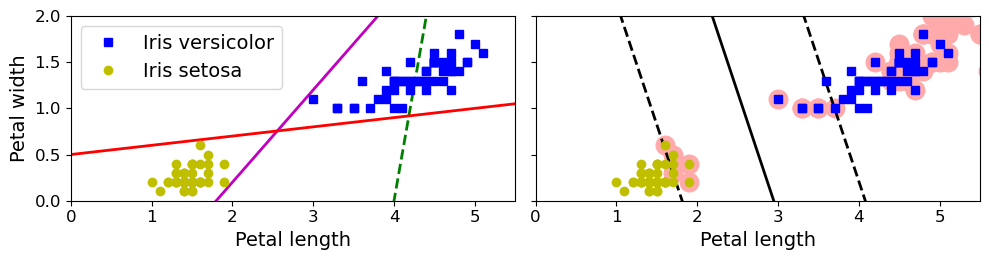

In [73]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

Si te fijas, las instancias que se encuentran 'fuera de la calle' no afectará al límite de decisión, está totalemtne determinado por las instancias que se encuentran en el borde. Estas instancias se denominan 'vectores soporte' y aparecen redondeadas en la figura de la derecha. 

Como verás en la siguiente imágen generada, las SVM son sensibles a las escalas de las características. Como verás en la imagen de la izquierda, la escala vertical es mucho mayor que la horizontal; por lo tanto, la calle más ancha posible será la horizontal. Si te fijas en la imagen de la derecha, esto se ha solucionado. Por lo tanto, siempre que se utilice SVM es recomendable realizar un escalado. 

Saving figure sensitivity_to_feature_scales_plot


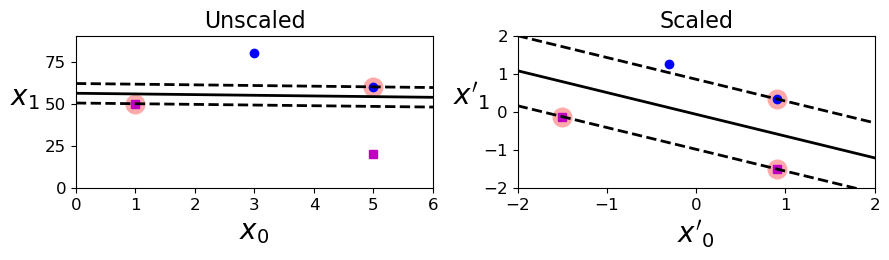

In [74]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")


Al crear un modelo de SVM podemos incluir una serie de hiperparámetros. El parámetro C será uno de ellos, si lo configuramos con un valor bajo tendremos un modelo semejante al de la siguiente imagen a la izquierda; por el contrario, si lo definimos con un valor alto obtendremos un modelo como el de la imagen de la derecha. 

Si consideras que un modelo está muy sobreentrenado podrás regularizarlo reduciendo la C.

A continuación verás que utilizo LinearSVC. La clase sklearn.svm.LinearSVC permite ajustar modelos SVM con kernel lineal. Es similar a SVC cuando el parámetro kernel='linear', pero utiliza un algoritmo más rápido.

In [75]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

df_iris = datasets.load_iris(as_frame=True).frame

X = df_iris[['petal length (cm)','petal width (cm)']].values
y = (df_iris["target"] == 2).astype(np.float64).values  # Iris virginica


svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [76]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/Users/csadan/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [77]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

Saving figure regularization_plot


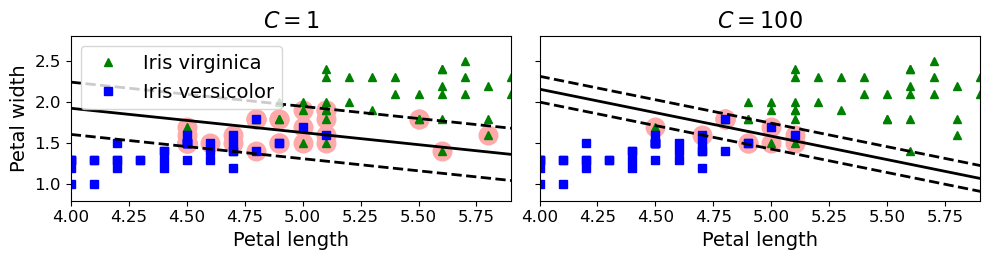

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

## Clasificación no lineal

Aunque los clasificadores SVM lineales son eficientes y funcionan soprendentemente bien en muchos casos, muchos conjuntos de datos no se acercan siquiera a ser separables. Un enfoque es añadir más características, como por ejemplo polinomiales; lo cual muchas veces permite separar conjuntos de datos linealmente. 

En el siguente gráfico se muestra un conjunto de datos con solo una característica, este conjunto no es seprable linealmente, pero si añades una segunda característica, si que se puede separar linealmente. 

Saving figure higher_dimensions_plot


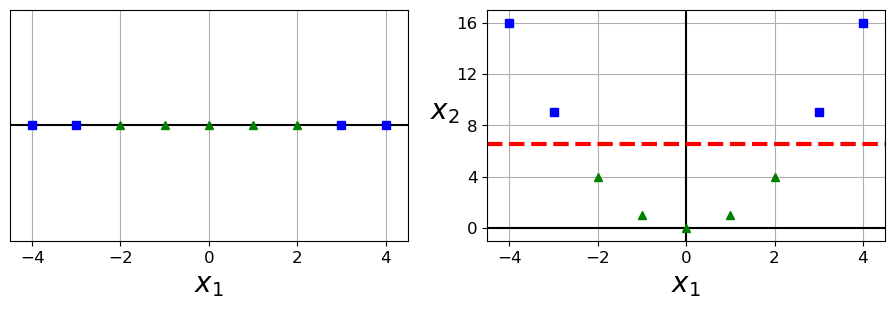

In [79]:
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

Si queremos implementar esta idea, podemos utilizar el transformador PolynomialFeatures, seguido de standardScaler y LinearSVC. Vamos a probar a continuación con una clasificación binaria en la que los puntos de datos tienen la forma de semicírculos intercalados. Este conjunto de datos lo crearemos con la función make_moons().

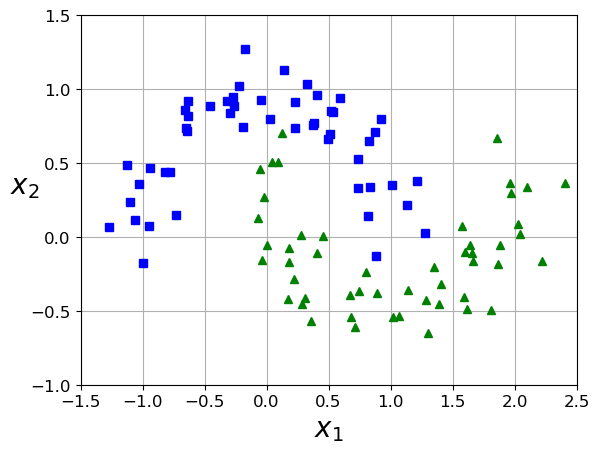

In [80]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

El código que se ve a continuación utiliza PolynomialFeatures para agregar características polinomiales de tercer grado, luego escala los datos y entrena un modelo SVM lineal. Un modelo SVM lineal es solo un caso especial de un modelo SVM con un kernel polinomial de grado 1, por lo que el siguiente código no es tan diferente de usar un modelo SVM con un kernel polinomial (excepto quizás para la escala de los datos).

In [81]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/Users/csadan/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

Saving figure moons_polynomial_svc_plot


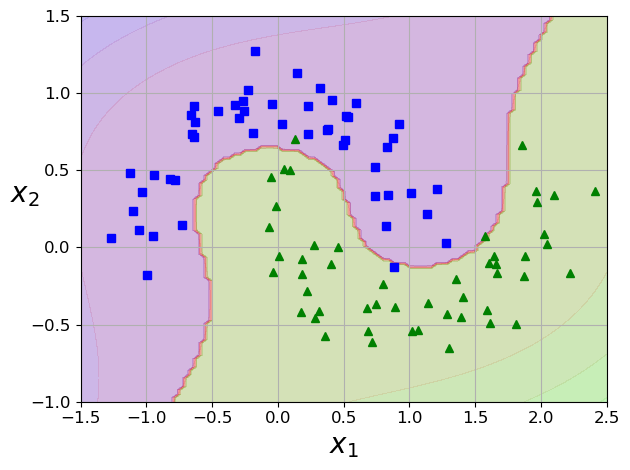

In [82]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

### Kernel polinomial

Añadir características polinomiales como hemos realizado anteriormente puede funcionar. En un grado polinomial bajo, este método no puede manejar conjuntos de datos muy complejos y, con un grado polinomial alto, crea una cantidad de características enormes; por lo tanto, lo hace demasiado lento. 

En SVM puedes utilizar una técnica matemática variando el kernel. Esto hace posible conseguir el mismo resultado que si hubieras añadido características polinomiales. Vamos a probarlo con el conjunto de datos anterior.

Para ello entrenaremos un kernel polinomial (poly) de tercer grado. El parametro coef0 indica cómo está influido el modelo por los polinomios de grado alto respecto a los de grado más bajo. 

In [83]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)
polynomial_svm_clf.fit(X, y)

/Users/csadan/anaconda3/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

El siguiente modelo es igual pero indicando que es de grado 10 y un coef0 de 100. 

In [84]:
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

A continuación se muestran graficamente ambos modelos. Si el modelo está sobreajustado, te convendrá reducir el grado polinomial. Por el contrario, si está subajustado, puedes probar a incrementarlo. 

Saving figure moons_kernelized_polynomial_svc_plot


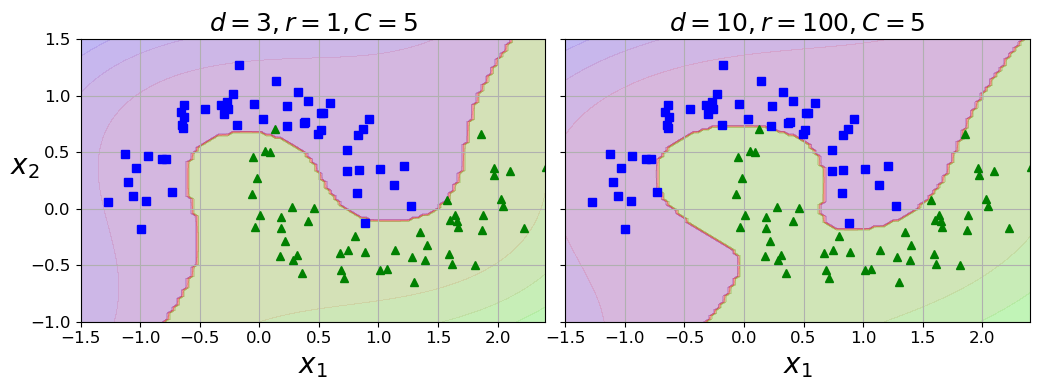

In [85]:
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

### Kernel de funcion de base radial gaussiana

En vez de añadir características polinómicas, podemos añadir nuevas características en base a la función de similitud (no se explicará). Para ello definiremos un kernel con valor 'rbf' que aceptará un hiperparámetro llamado gamma. 

In [86]:
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

El siguiente código nos mostrará 4 figuras diferentes. En concreto, la que representa el código anterior es la de abajo a la izquierda. Viendo estas imagenes podemos llegar a la conclusión de que:

1. Aumentar gamma hace que la curva de campana se estreche. Serpenteará para alcanzar valores individuales. Esto hará que el modelo se sobreajuste. 
2. Disminuir gamma hace que la curva desaparezca y casi alcance la línea recta. Esto hará que el modelo se subajuste. 

Saving figure moons_rbf_svc_plot


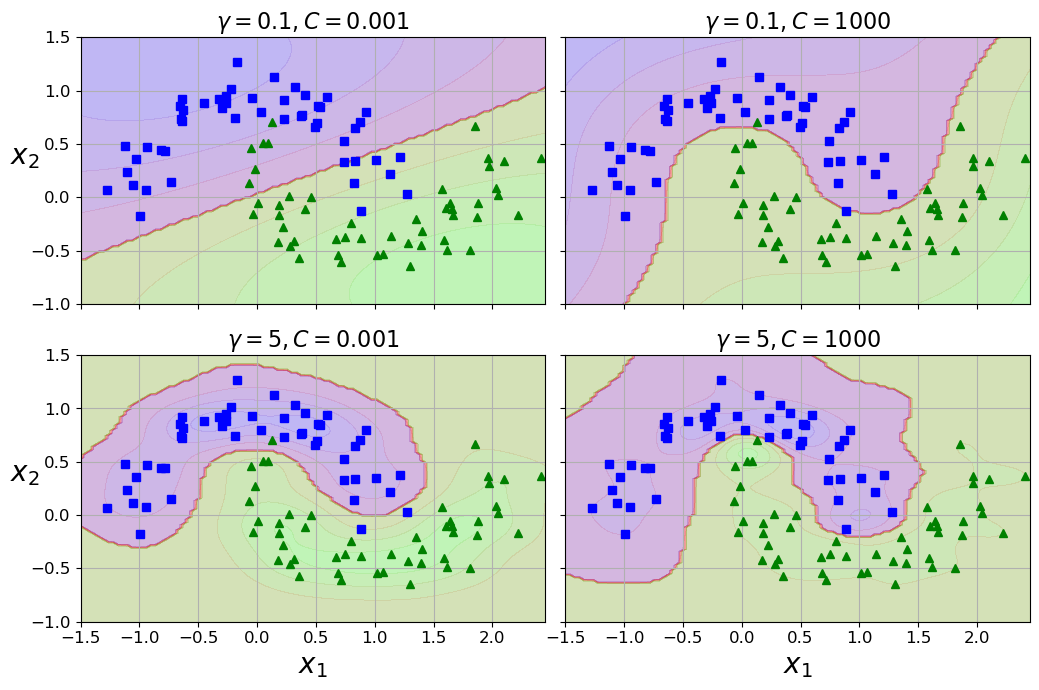

In [87]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

## Regresión SVM

El algoritmo de SVM es versátil y no solo soporta clasificación lineal y no lineal, sino que también soporta regresión lineal y no lineal. Para utilizar SVM en regresión en vez de clasificación, se debe invertir el objetivo. En vez de intentar ajustar la calle más grande posible entre dos clases, limitando las violaciones del margen, ahora intentaremos encajar tantas instancias como sea posible en la calle. El siguiente código muestra dos figuras que ilustran esta explicación, el parámetro epsilon indica el tamaño del margen. 

Saving figure svm_regression_plot


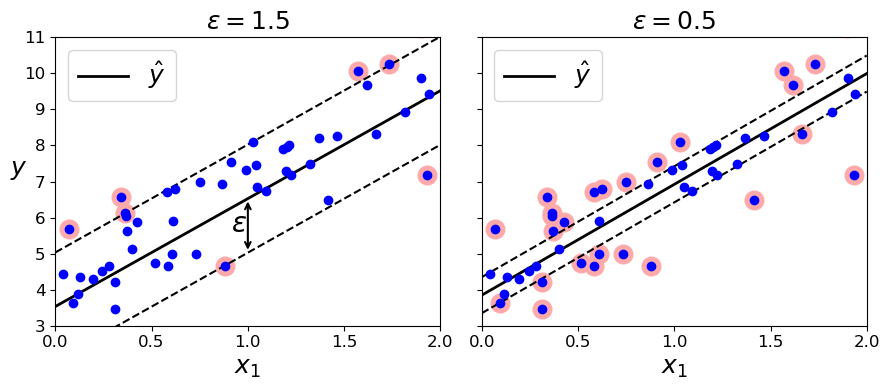

In [88]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])


def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

Para crear modelos de regresión lineal utilizando SVM utilizaremos la instrucción:
```Python
LinearSVR(epsilon=1.5, random_state=42)
```

De la misma forma también podremos utilizar regresión no lineal indicando valores del kernel diferentes como 'poly' o 'rbf' a SVR. 

```Python
SVR(kernel='poly', degree=2, C=100, epsilon=0.1)
```

# Ejemplos

## Ejemplo 1. Clasificación SVM dataset Iris

En el siguiente ejemplo entrenaremos diferentes modelos SVM con el dataset iris y veremos sus resultados. 

In [104]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelos = {
    'linear': SVC(kernel='linear', C=1),
    'poly': SVC(kernel='poly', C=1.0, degree=3),
    'rbf': SVC(kernel='rbf', C=1.0, gamma=0.1),
}

for modelo in modelos:

    clf = modelos[modelo]
    clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    predictions = clf.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, predictions)
    print("Precisión del modelo {}: {:.2f}%".format(modelo, accuracy * 100))



Precisión del modelo linear: 97.78%
Precisión del modelo poly: 95.56%
Precisión del modelo rbf: 100.00%


## Ejemplo 2. Clasificación SVM dataset Breast Cancer

En el siguiente código haremos lo mismo pero aplicado al dataset de cancer de mama


In [107]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Cargar el conjunto de datos Breast Cancer
cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

modelos = {
    'linear': SVC(kernel='linear', C=1),
    'poly': SVC(kernel='poly', C=1.0, degree=3),
    'rbf': SVC(kernel='rbf', C=1.0, gamma=0.1),
}

for modelo in modelos:

    clf = modelos[modelo]
    clf.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    predictions = clf.predict(X_test)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(y_test, predictions)
    print("Precisión del modelo {}: {:.2f}%".format(modelo, accuracy * 100))


Precisión del modelo linear: 95.61%
Precisión del modelo poly: 86.84%
Precisión del modelo rbf: 96.49%


## Ejemplo 3. Regresión SVM con el dataset de Diabetes

In [113]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos de diabetes
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar el modelo de regresión SVM
regressor = SVR(C= 100, gamma= 0.01, kernel= 'rbf')
regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = regressor.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse))


Error Cuadrático Medio (MSE): 2852.66


Mejores Parámetros: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Error Cuadrático Medio (MSE): 2852.66


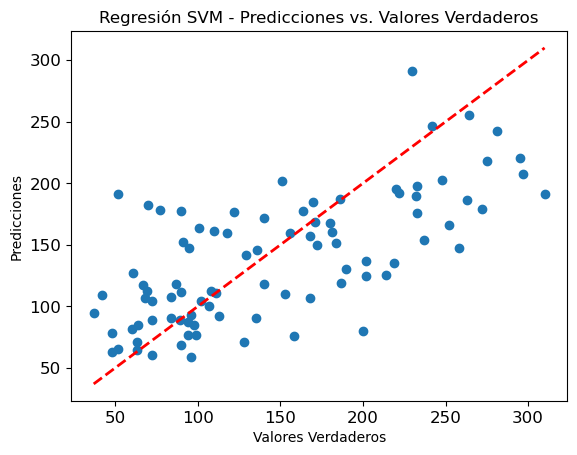

In [110]:
# Importar bibliotecas necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos de diabetes
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir los parámetros para la búsqueda de cuadrícula
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10], 'kernel': ['rbf']}

# Crear el modelo de regresión SVM
regressor = SVR()

# Realizar la búsqueda de cuadrícula para encontrar los mejores parámetros
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores Parámetros:", best_params)

# Entrenar el modelo con los mejores parámetros
best_regressor = SVR(**best_params)
best_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = best_regressor.predict(X_test)

# Calcular el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, predictions)
print("Error Cuadrático Medio (MSE): {:.2f}".format(mse))

# Visualizar resultados
plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title("Regresión SVM - Predicciones vs. Valores Verdaderos")
plt.xlabel("Valores Verdaderos")
plt.ylabel("Predicciones")
plt.show()
